In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p


/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Ages from https://ui.adsabs.harvard.edu/abs/2019yCat..22390032P/abstract

In [2]:
from astropy.io import fits

In [3]:
hdulist = fits.open('asu.fit')


In [4]:
df1 = pd.DataFrame(hdulist[1].data, dtype="float64")
df2 = pd.DataFrame(hdulist[2].data, dtype="float64")

In [5]:
df=pd.merge(df1,df2,left_on='KIC',right_on='KIC',how='inner')

In [6]:
df.columns

Index(['_RAJ2000', '_DEJ2000', 'KIC', '_2MASS', 'Teff', 'e_Teff', 'FeH',
       'e_FeH', 'AFe', 'e_AFe', 'Numax', 'e_Numax', 'Dnu', 'e_Dnu', 'ES',
       'Fdnu', 'e_Fdnu', 'M_cor_', 'e_M_cor_', 's_M_cor_', 'R_cor_',
       'e_R_cor_', 's_R_cor_', 'logg_seis_', 'e_logg_seis_', 's_logg_seis_',
       'Rho', 'e_Rho', 's_Rho', 'LogAge', 'E_LogAge', 'e_logage_lc', 'Av',
       'e_Av', 'Notes', 'AP-1', 'KCat', 'Sloan', 'Simbad', '_RA', '_DE',
       'Nmax-A2Z', 'e_Nmax-A2Z', 'Dnu-A2Z', 'e_Dnu-A2Z', 'Nmax-CAN',
       'e_Nmax-CAN', 'Dnu-CAN', 'e_Dnu-CAN', 'Nmax-COR', 'e_Nmax-COR',
       'Dnu-COR', 'e_Dnu-COR', 'Nmax-OCT', 'e_Nmax-OCT', 'Dnu-OCT',
       'e_Dnu-OCT', 'Nmax-SYD', 'e_Nmax-SYD', 'Dnu-SYD', 'e_Dnu-SYD'],
      dtype='object')

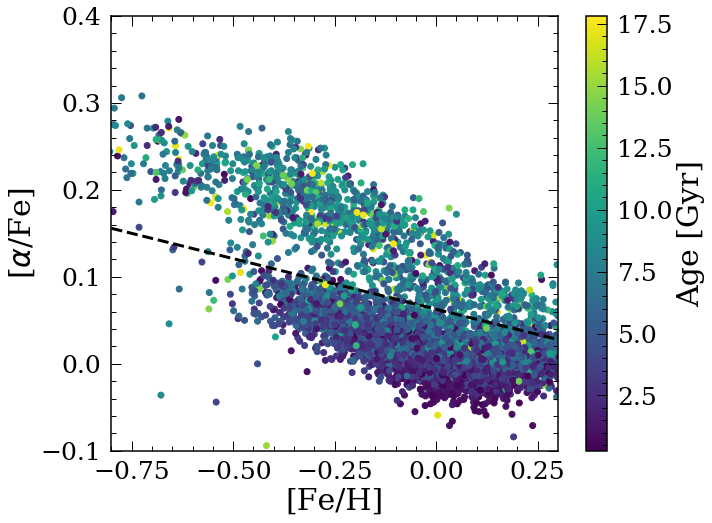

In [7]:
df['Age']=np.power(10,df['LogAge'])/1e3
df['Age_err']=np.power(10,df['E_LogAge'])/1e3

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df['FeH'],df['AFe'],c=df['Age'])
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')

Text(0, 0.5, '[$\\alpha$/Fe]')

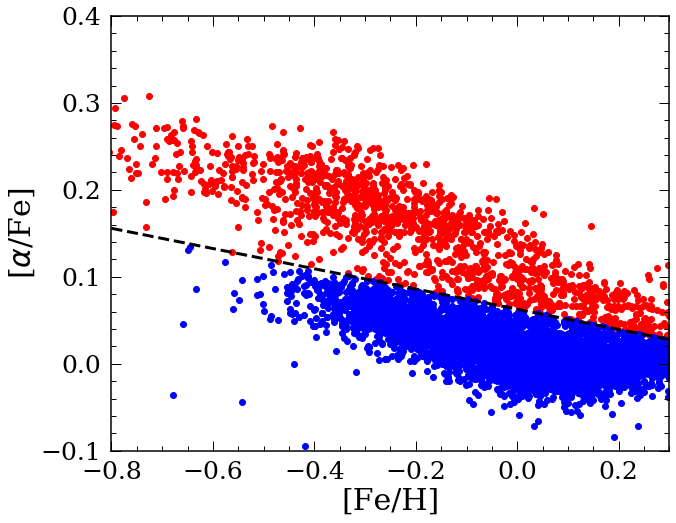

In [8]:
high_alpha=df[df['AFe']-p(df['FeH'])>=0]
low_alpha=df[df['AFe']-p(df['FeH'])<0]

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(10,8))
plt.scatter(high_alpha['FeH'],high_alpha['AFe'],c='r')
plt.scatter(low_alpha['FeH'],low_alpha['AFe'],c='b')
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')


100%|██████████| 49/49 [00:00<00:00, 153.42it/s]


Text(0.5, 0, 'Age[Gyr]')

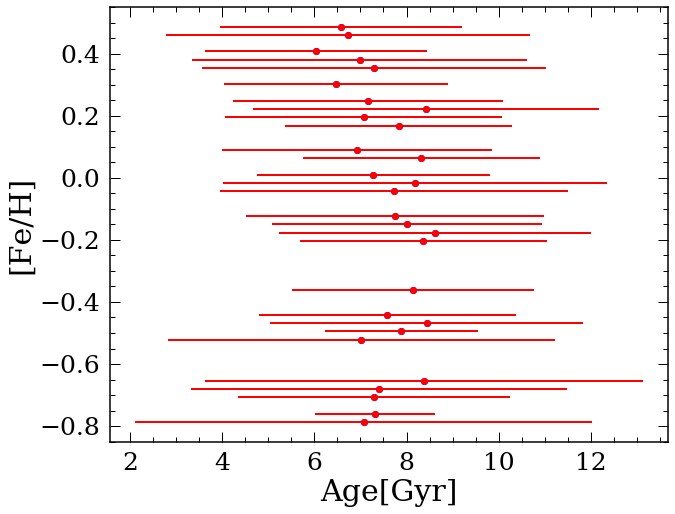

In [20]:
from tqdm import trange
def getave_age(age,feh):
    Nbin=50
    febins=np.linspace(-0.8,0.5,Nbin)
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)
        meanfeh[i]=(binlow+binhi)/2

        m=(feh>=binlow)&(feh<=binhi)
        #print(sum(m))
        
        meanage[i]=np.mean(age[m])
        meanage_err[i]=np.std(age[m])
        starnumb[i]=sum(m)
    return meanfeh,meanage,meanage_err,starnumb



plt.figure(figsize=(10,8))
meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(high_alpha['Age'].values,high_alpha['FeH'].values)
meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(high_alpha['Age'].values,high_alpha['FeH'].values)
cm = plt.cm.get_cmap('viridis',5)
plt.errorbar(meanage_la,meanfeh_la,xerr=meanage_err_la,fmt='bo')
plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,fmt='ro')
#plt.scatter(low_alpha['Age'],low_alpha['FeH'],c='b',s=1,alpha=0.5)
#plt.xlim([-0.8,0.3])
#plt.ylim([-0.1,0.4])
plt.ylabel('[Fe/H]')
plt.xlabel('Age[Gyr]')
#cb=plt.colorbar()
#cb.set_label('Age [Gyr]')

_RAJ2000
_DEJ2000
KIC
_2MASS
Teff
e_Teff
FeH
e_FeH
AFe
e_AFe
Numax
e_Numax
Dnu
e_Dnu
ES
Fdnu
e_Fdnu
M_cor_
e_M_cor_
s_M_cor_
R_cor_
e_R_cor_
s_R_cor_
logg_seis_
e_logg_seis_


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


s_logg_seis_
Rho
e_Rho
s_Rho
LogAge
E_LogAge
e_logage_lc
Av
e_Av
Notes
AP-1
KCat
Sloan
Simbad
_RA
_DE
Nmax-A2Z
e_Nmax-A2Z
Dnu-A2Z
e_Dnu-A2Z
Nmax-CAN
e_Nmax-CAN
Dnu-CAN
e_Dnu-CAN
Nmax-COR
e_Nmax-COR
Dnu-COR
e_Dnu-COR
Nmax-OCT
e_Nmax-OCT
Dnu-OCT
e_Dnu-OCT
Nmax-SYD
e_Nmax-SYD
Dnu-SYD
e_Dnu-SYD
Age
Age_err


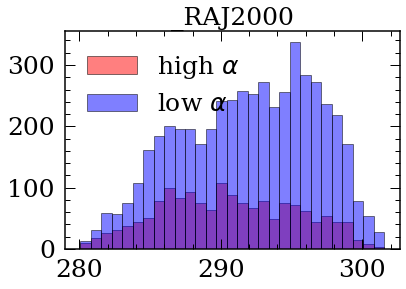

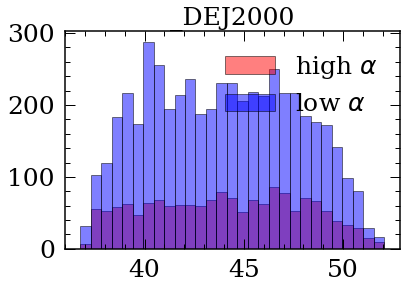

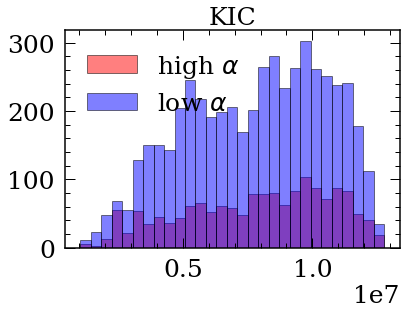

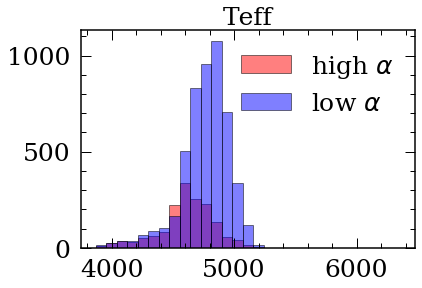

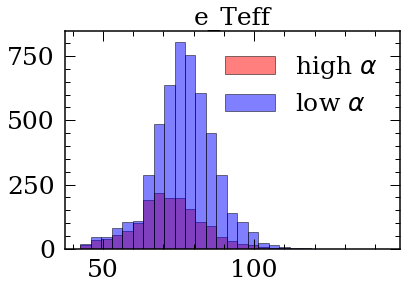

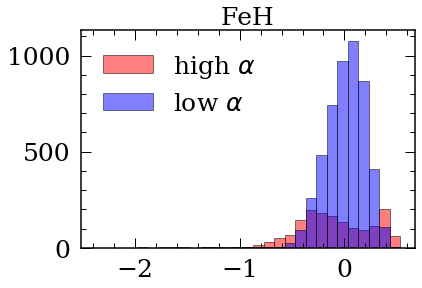

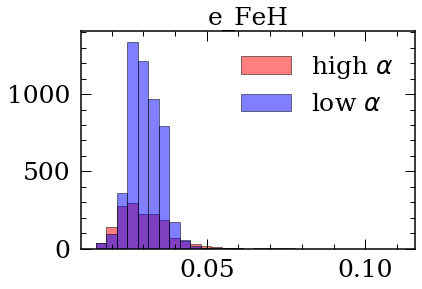

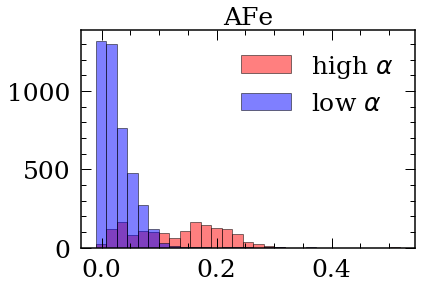

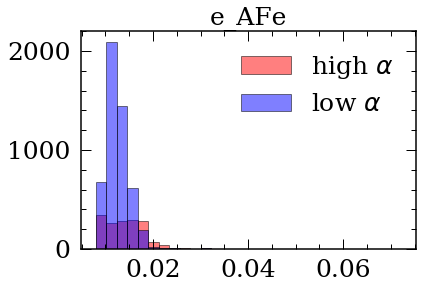

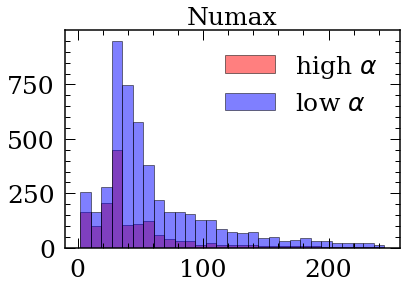

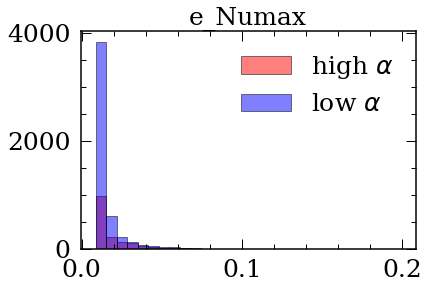

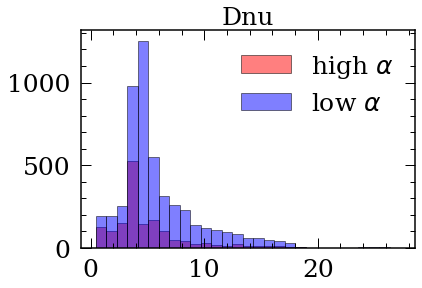

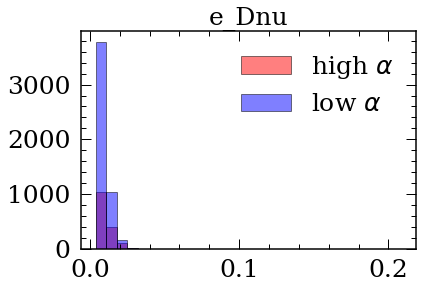

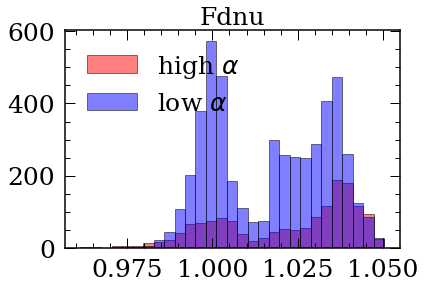

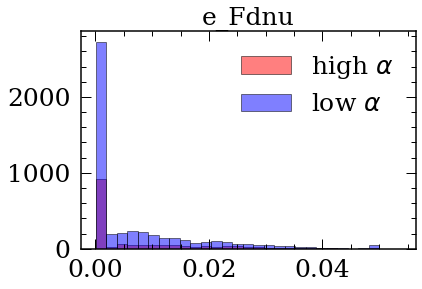

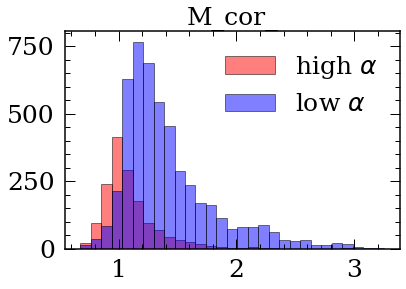

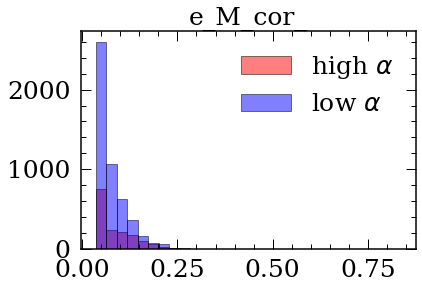

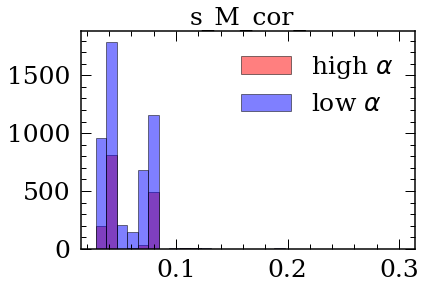

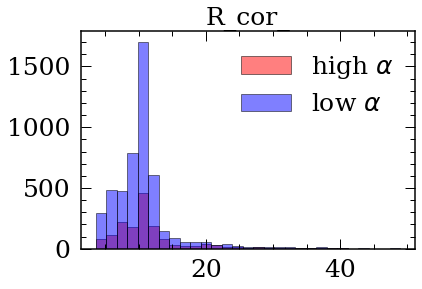

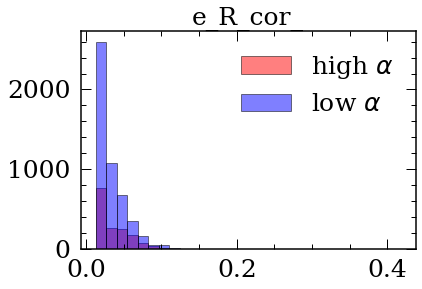

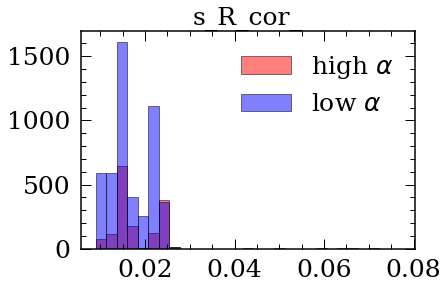

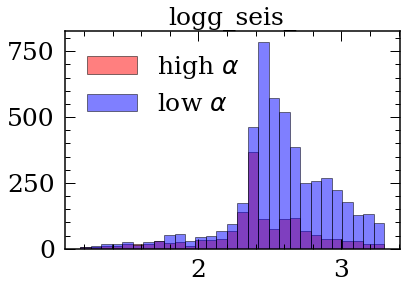

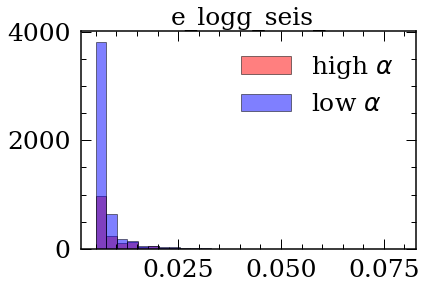

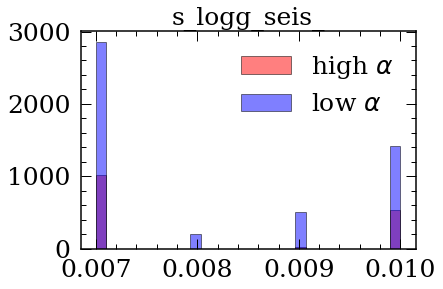

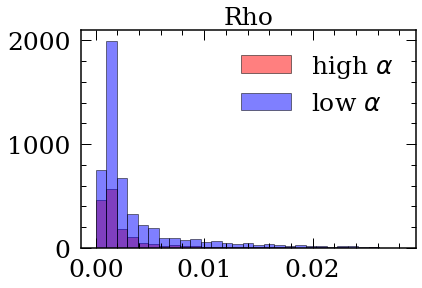

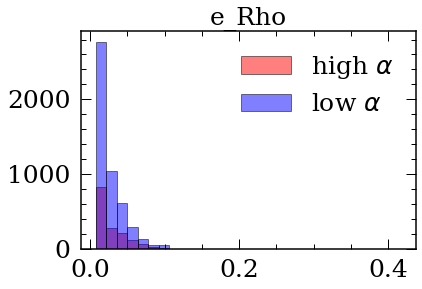

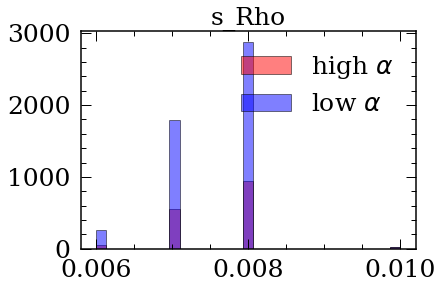

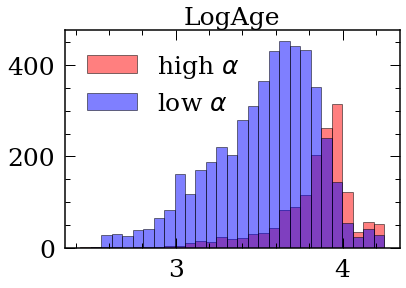

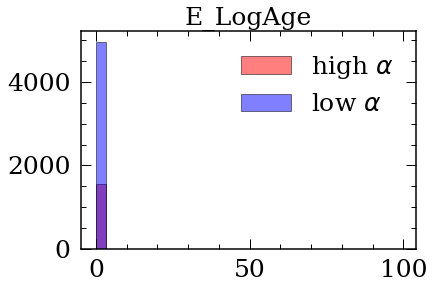

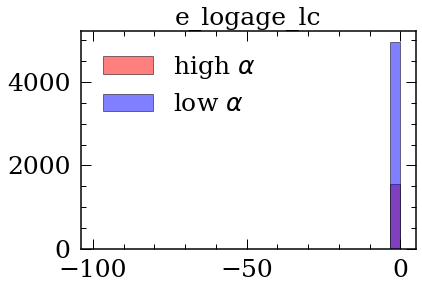

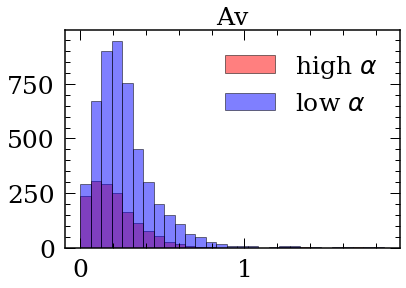

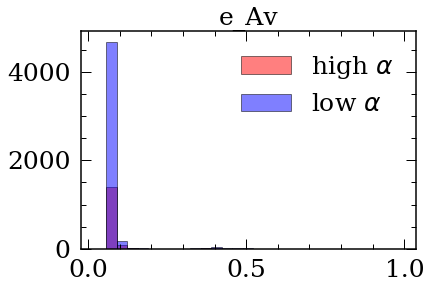

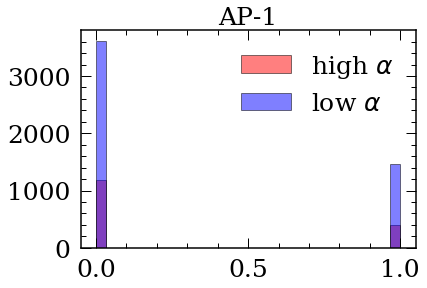

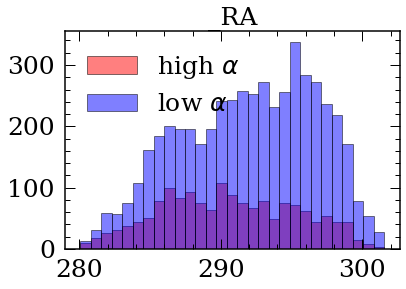

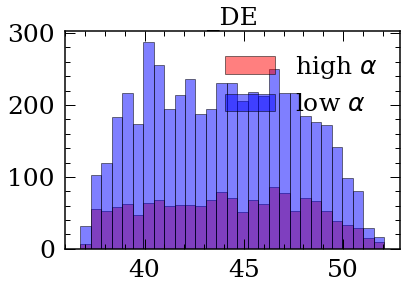

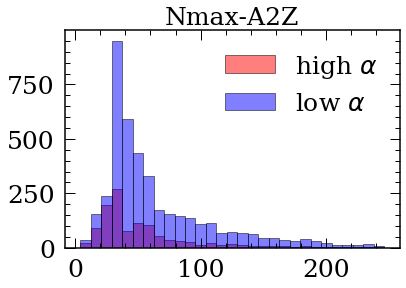

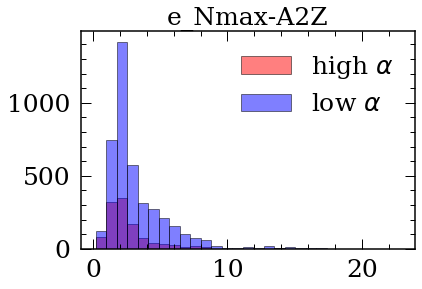

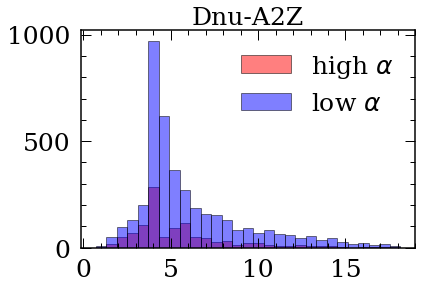

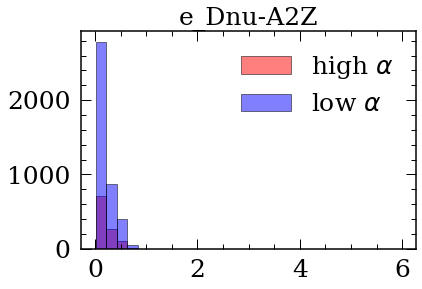

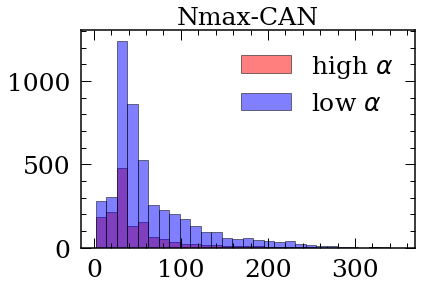

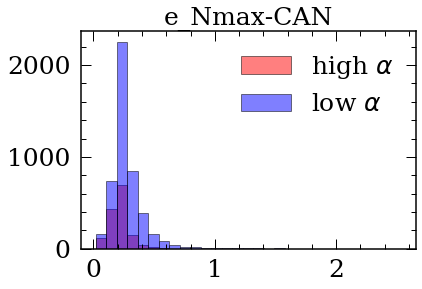

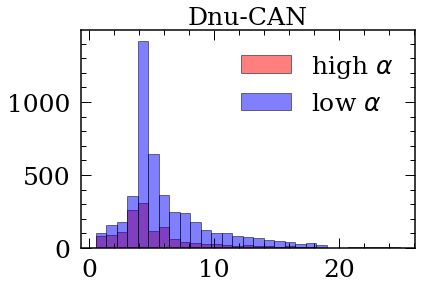

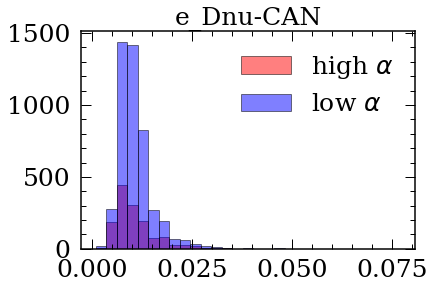

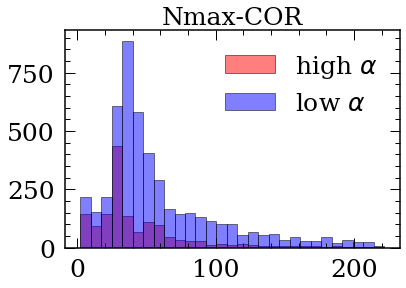

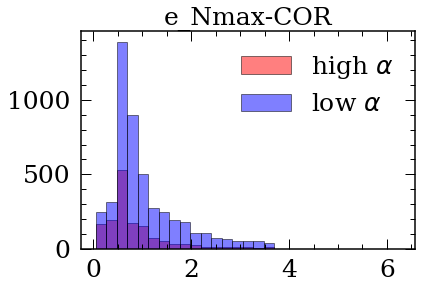

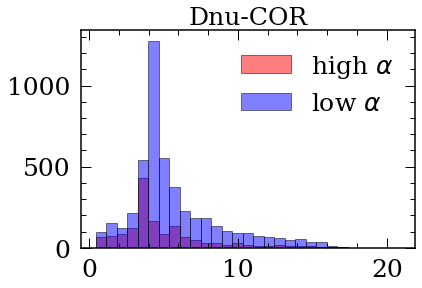

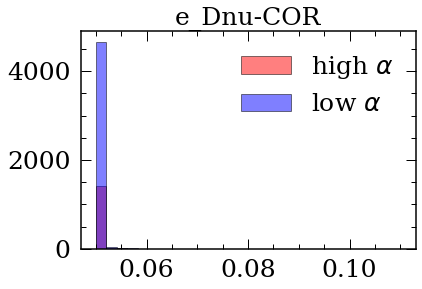

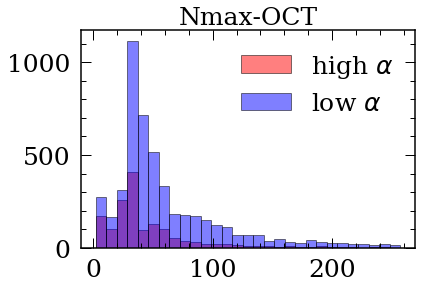

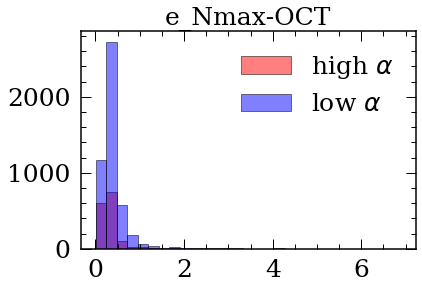

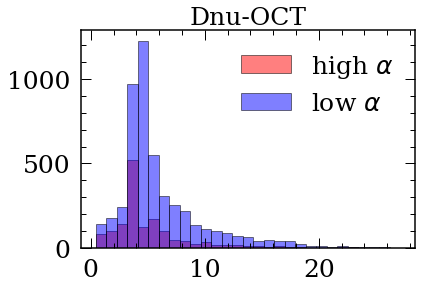

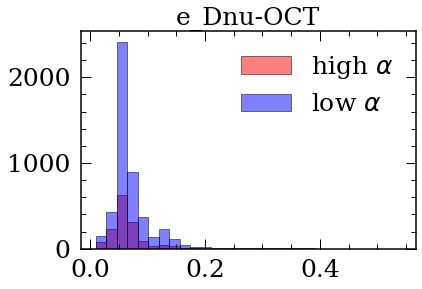

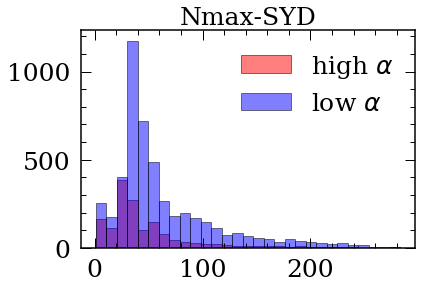

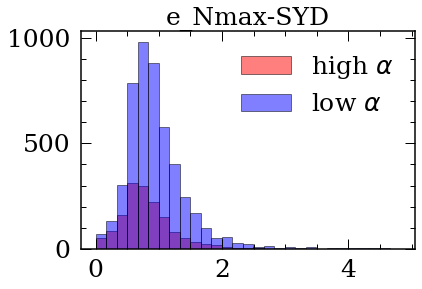

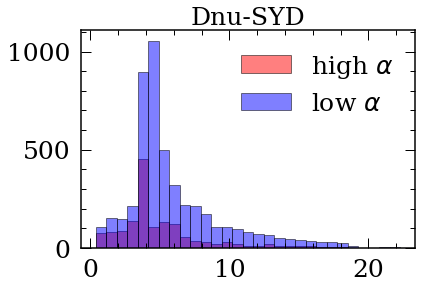

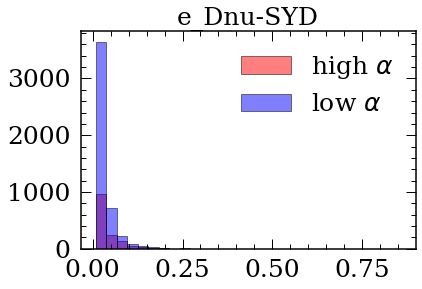

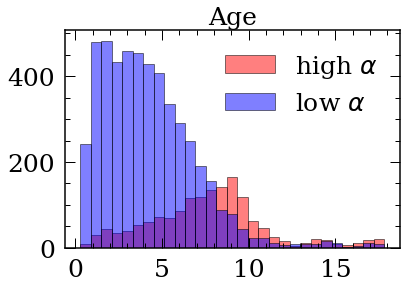

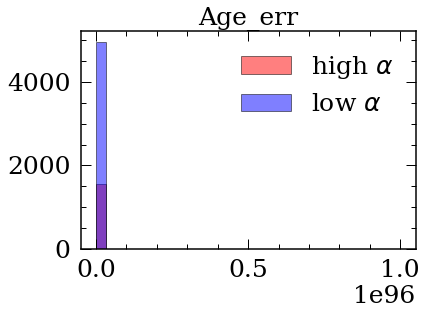

In [9]:
# plot histograms
for col in df.columns:
    print(col)
    if not type(df[col][0])==type('s'):
        high_alpha_p=high_alpha[col].dropna()
        low_alpha_p=low_alpha[col].dropna()
        bins=np.linspace(min([min(high_alpha_p),max(low_alpha_p)]),
                         max([max(high_alpha_p),min(low_alpha_p)]),30)
        plt.figure()
        plt.hist(high_alpha_p,bins=bins,alpha=0.5,color='r',edgecolor='k',label='high $\\alpha$')
        plt.hist(low_alpha_p,bins=bins,alpha=0.5,color='b',edgecolor='k',label='low $\\alpha$')
        plt.title(col,fontsize=25)
        plt.legend()

In [10]:
# CM with APOGEE

df_apo=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')
df_apo['2MASS']=[i[2:] for i in df_apo['APOGEE_ID']]
df_apo['2MASS']


1         00000002+7417074
2         00000019-1924498
3         00000032+5737103
4         00000032+5737103
5         00000068+5710233
                ...       
473302    23595756+8535275
473303    23595837+5700444
473304    23595886-2009435
473305    23595886+5726058
473306    23595980+1528407
Name: 2MASS, Length: 473306, dtype: object

In [11]:
high_alpha

_RAJ2000   _DEJ2000         KIC            _2MASS         Teff  \
0     291.289042  36.749972   1027110.0  19250937+3644599  4177.600098   
2     290.886667  36.872417   1160789.0  19233280+3652207  4729.600098   
6     291.241292  36.891611   1162220.0  19245791+3653298  4190.100098   
7     291.359958  36.819889   1162746.0  19252639+3649116  4798.100098   
8     291.440167  36.846528   1163114.0  19254564+3650475  4285.799805   
...          ...        ...         ...               ...          ...   
6665  288.726917  51.876250  12688798.0  19145446+5152345  4199.100098   
6666  289.159750  51.864611  12689506.0  19163834+5151526  4937.299805   
6667  289.702125  51.868861  12690461.0  19184851+5152079  4749.799805   
6669  289.469000  51.911944  12735291.0  19175256+5154430  4718.399902   
6673  290.349000  52.083139  12785083.0  19212376+5204593  4689.100098   

         e_Teff    FeH  e_FeH    AFe  e_AFe  ...   Nmax-OCT  e_Nmax-OCT  \
0     51.799999 -0.232  0.025  0.205  0.015  ...   6.330000        0.07   
2     72.300003 -0.257  0.034  0.188  0.015  ...  25.549999        0.25   
6     51.700001  0.083  0.021  0.070  0.011  ...  11.040000        0.07   
7     75.599998 -0.388  0.038  0.229  0.017  ...  28.059999        0.25   
8     54.400002  0.297  0.020  0.025  0.010  ...  14.440000        0.17   
...         ...    ...    ...    ...    ...  ...        ...         ...   
6665  53.799999  0.315  0.019  0.032  0.010  ...  14.680000        0.25   
6666  92.400002 -0.333  0.039  0.218  0.017  ...        NaN         NaN   
6667  77.099998 -0.240  0.034  0.191  0.015  ...  29.190001        0.25   
6669  82.000000 -0.088  0.030  0.106  0.014  ...  29.879999        0.22   
6673  70.000000 -0.001  0.029  0.083  0.012  ...  28.490000        0.23   

      Dnu-OCT  e_Dnu-OCT Nmax-SYD  e_Nmax-SYD  Dnu-SYD  e_Dnu-SYD        Age  \
0        1.15       0.03    6.590       0.233    1.146      0.018  10.046155   
2        3.52       0.05   25.221       0.760    3.529      0.063   7.744617   
6        1.64       0.03   10.993       0.400    1.661      0.019  11.376279   
7        3.78       0.06   28.042       1.268    3.710      0.128   6.109420   
8        1.86       0.03   14.349       0.671    1.895      0.013   3.451438   
...       ...        ...      ...         ...      ...        ...        ...   
6665     1.96       0.03   13.658       0.995    2.016      0.064  10.471285   
6666     4.30       0.05      NaN         NaN      NaN        NaN   1.566751   
6667     3.85       0.06   27.130       1.456    3.850      0.106   7.834297   
6669     3.98       0.07   30.636       0.717    4.018      0.033   7.396052   
6673     3.65       0.06   28.994       1.756    3.534      0.148   4.415704   

       Age_err  
0     0.001603  
2     0.001358  
6     0.001222  
7     0.001377  
8     0.001199  
...        ...  
6665  0.001652  
6666  0.002168  
6667  0.001321  
6669  0.001169  
6673  0.001611  

[1583 rows x 63 columns]

In [34]:
df_cm_ha=pd.merge(high_alpha,df_apo,left_on='_2MASS',right_on='2MASS',how='inner')
df_cm_la=pd.merge(low_alpha,df_apo,left_on='_2MASS',right_on='2MASS',how='inner')


In [13]:
list(df_cm_ha.columns)

['_RAJ2000',
 '_DEJ2000',
 'KIC',
 '_2MASS',
 'Teff',
 'e_Teff',
 'FeH',
 'e_FeH',
 'AFe',
 'e_AFe',
 'Numax',
 'e_Numax',
 'Dnu',
 'e_Dnu',
 'ES',
 'Fdnu',
 'e_Fdnu',
 'M_cor_',
 'e_M_cor_',
 's_M_cor_',
 'R_cor_',
 'e_R_cor_',
 's_R_cor_',
 'logg_seis_',
 'e_logg_seis_',
 's_logg_seis_',
 'Rho',
 'e_Rho',
 's_Rho',
 'LogAge',
 'E_LogAge',
 'e_logage_lc',
 'Av',
 'e_Av',
 'Notes',
 'AP-1',
 'KCat',
 'Sloan',
 'Simbad',
 '_RA',
 '_DE',
 'Nmax-A2Z',
 'e_Nmax-A2Z',
 'Dnu-A2Z',
 'e_Dnu-A2Z',
 'Nmax-CAN',
 'e_Nmax-CAN',
 'Dnu-CAN',
 'e_Dnu-CAN',
 'Nmax-COR',
 'e_Nmax-COR',
 'Dnu-COR',
 'e_Dnu-COR',
 'Nmax-OCT',
 'e_Nmax-OCT',
 'Dnu-OCT',
 'e_Dnu-OCT',
 'Nmax-SYD',
 'e_Nmax-SYD',
 'Dnu-SYD',
 'e_Dnu-SYD',
 'Age',
 'Age_err',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'APOGEE_ID',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA',
 'DEC',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'APOGEE2_TARGET1',
 'APOGE

In [74]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

abun_apog_err=[i+'_ERR' for i in abun_apog]

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}


df_abun_ha=df_cm_ha[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','FeH','2MASS','Teff','AFe','GAIA_R_EST']))].dropna()
df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['FeH']<0.05)]
df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['GAIA_R_EST']-2000)<1000]

df_abun_la=df_cm_la[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','FeH','2MASS','Teff','AFe','GAIA_R_EST']))].dropna()
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['FeH']<0.05)]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['GAIA_R_EST']-2000)<1000]


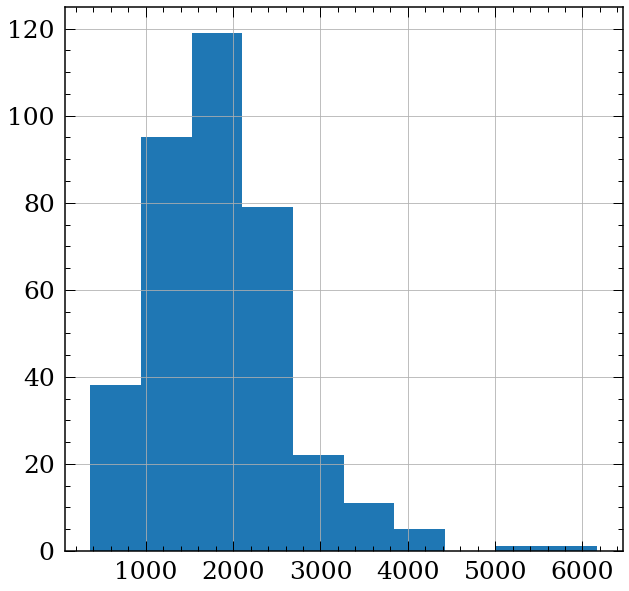

In [82]:
df_abun_st_ha['GAIA_R_EST'].hist()

1576
4624.455146286088


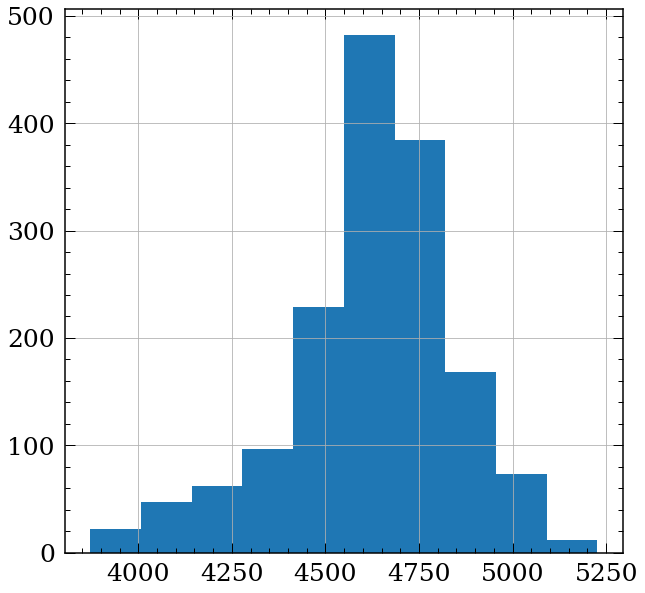

In [76]:
print(len(df_abun_ha))
print(np.mean(df_abun_ha['Teff']))
df_abun_ha['Teff'].hist()

tempcut=4624

In [83]:
rangeTeff=25

df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['Teff']-tempcut)<rangeTeff]
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['Teff']-tempcut)<rangeTeff]


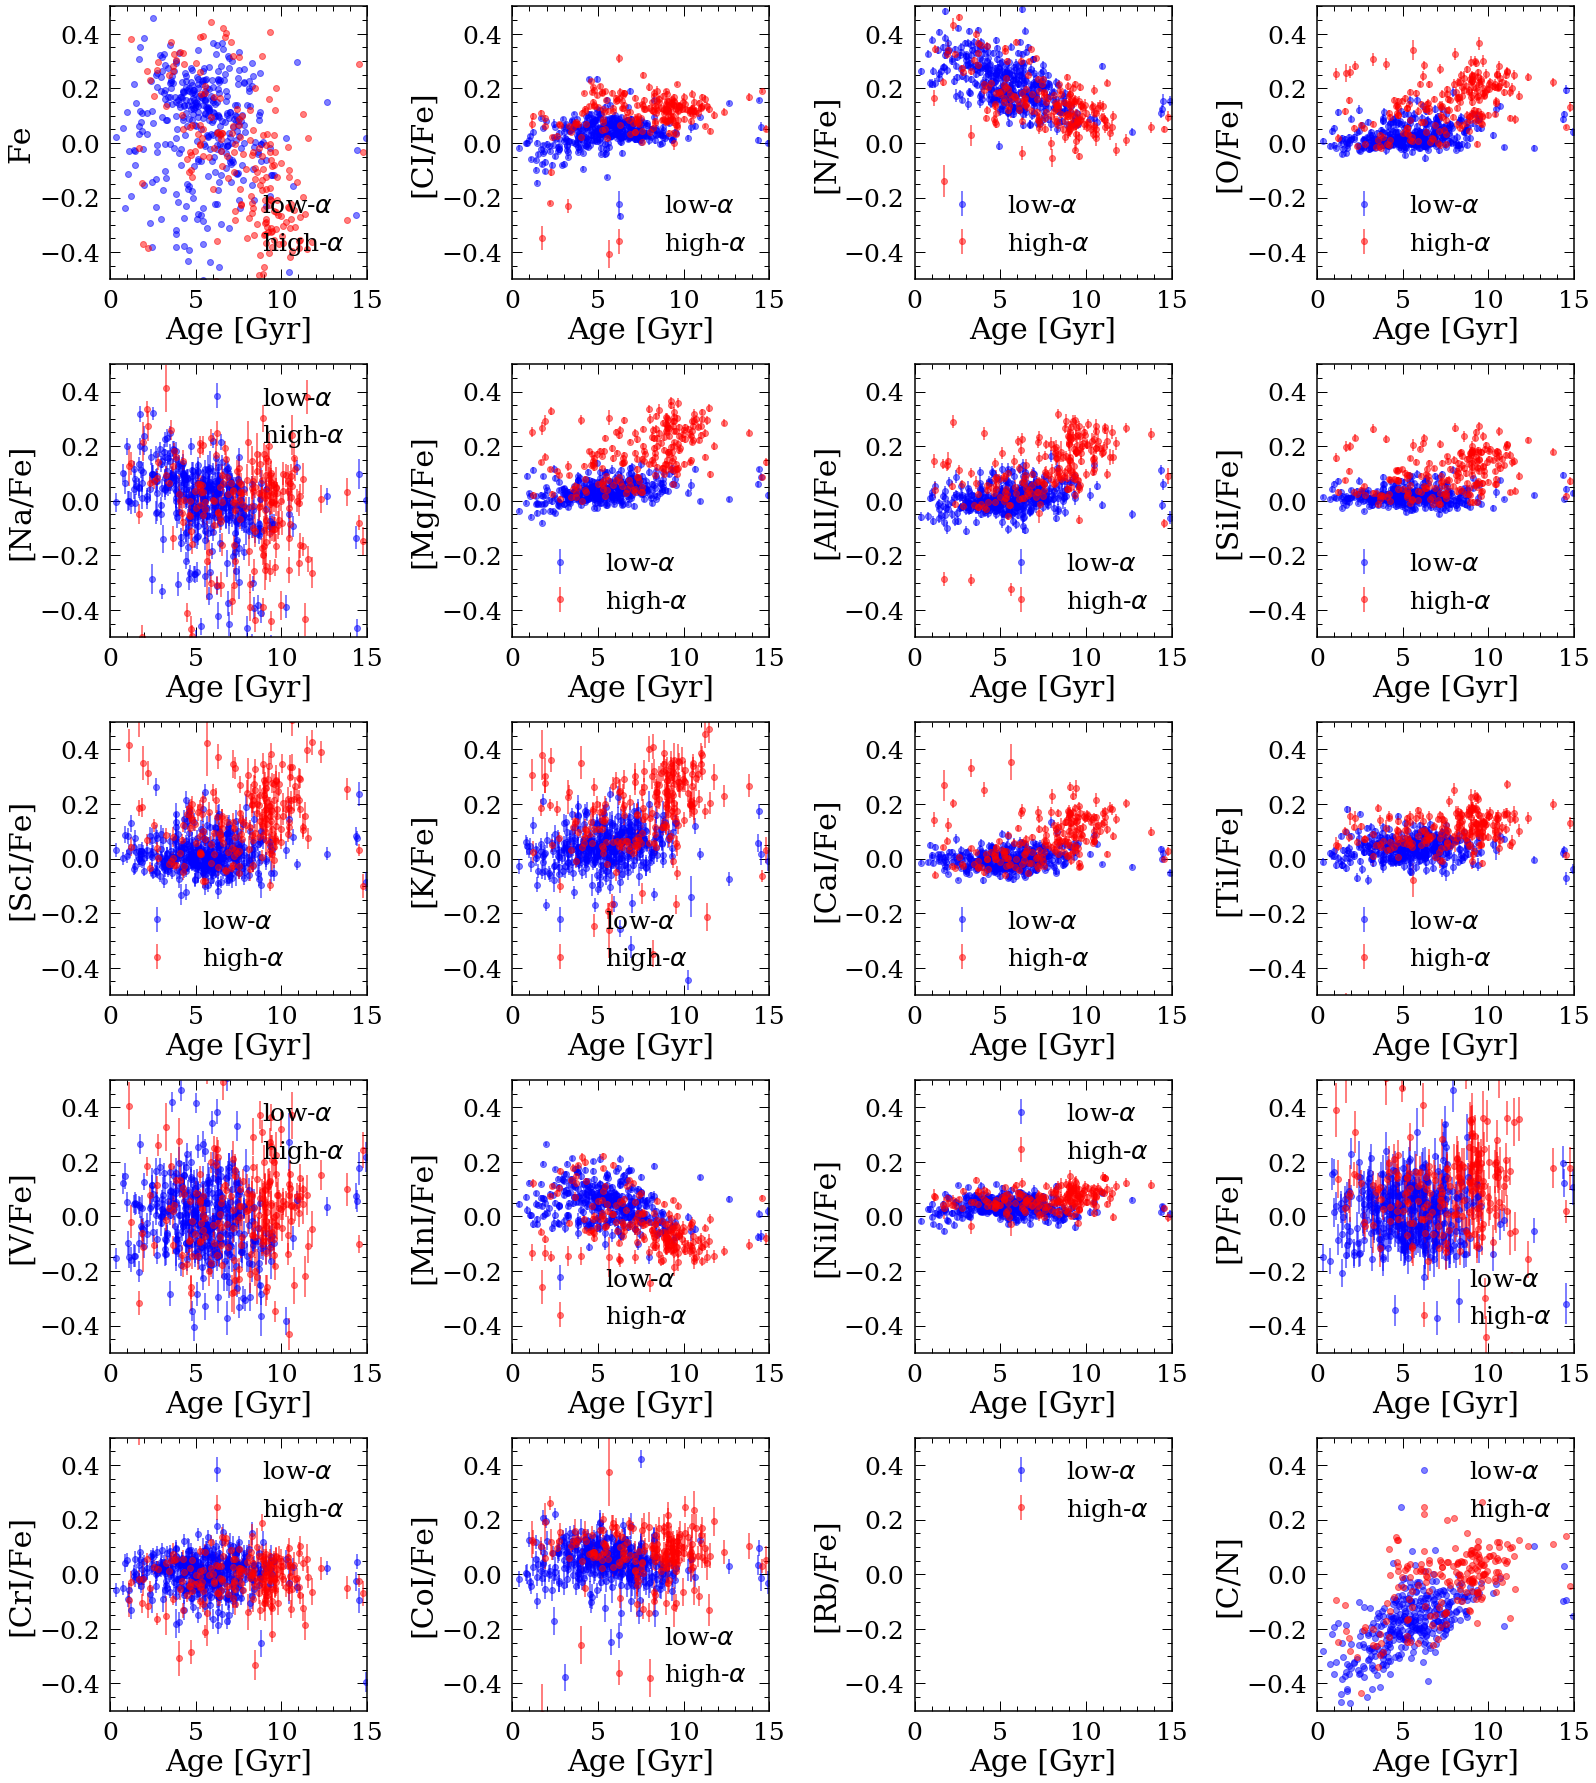

In [88]:
lim=[-0.5,0.5]
limx=[0,15]
plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],yerr=df_plot_la[abun_apog[i]+'_ERR'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],yerr=df_plot_ha[abun_apog[i]+'_ERR'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.ylim(lim)
    plt.xlim(limx)
    plt.legend()
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
plt.ylim(lim)
plt.xlim(limx)
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()
plt.ylim(lim)
plt.xlim(limx)


plt.tight_layout()

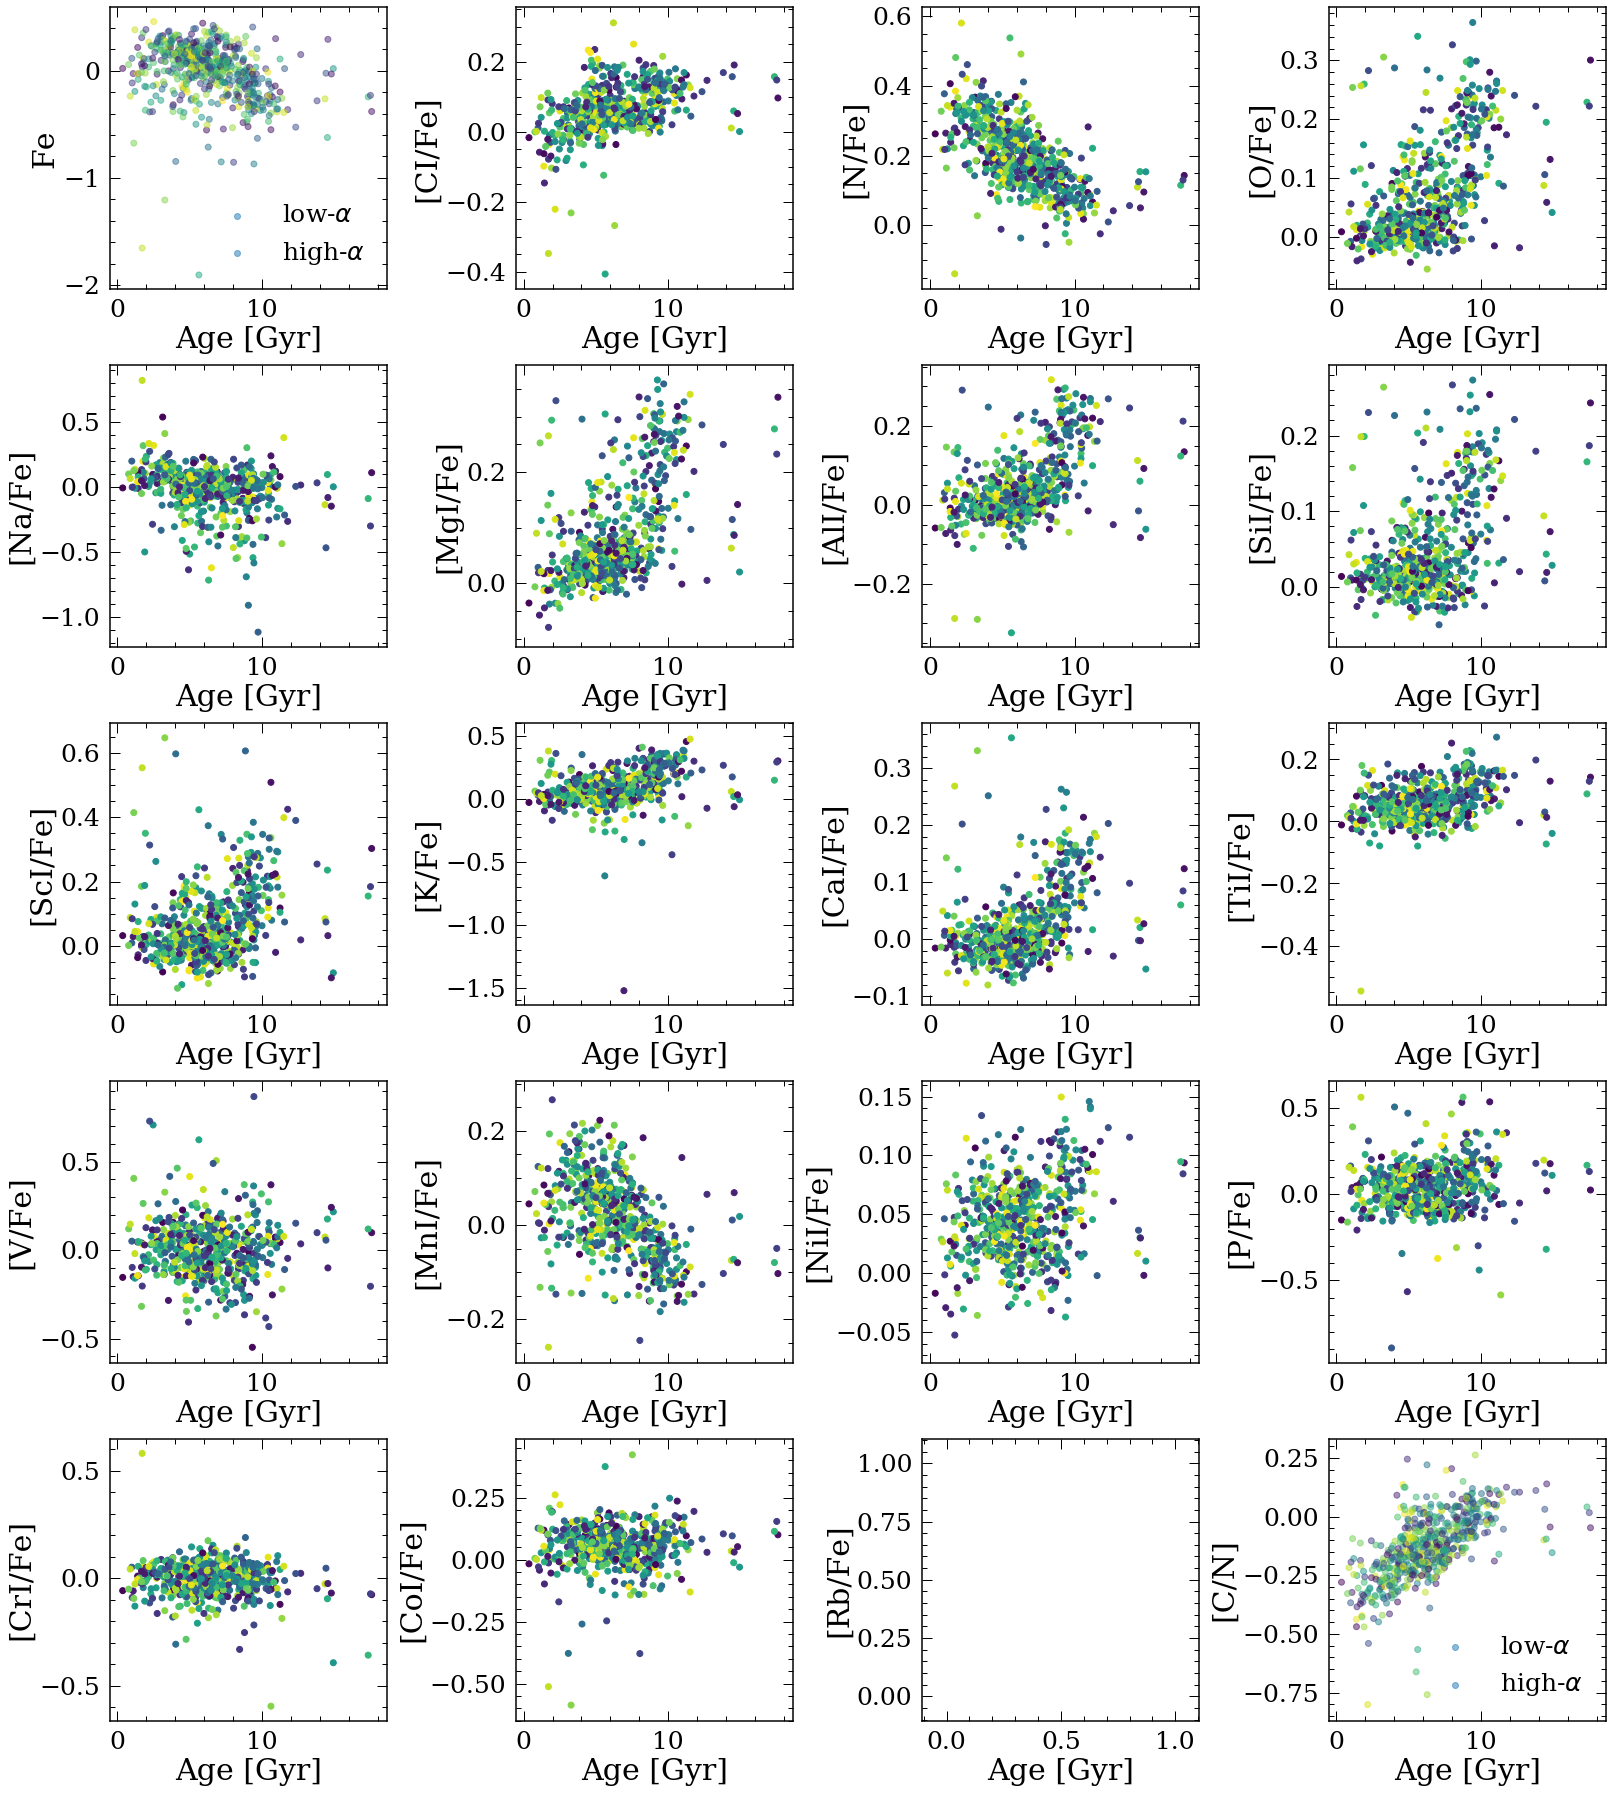

In [85]:
plt.figure(figsize=(22.5,25))
cm = plt.cm.get_cmap('viridis',5)
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    plt.subplot(5,4,i+1)
    plt.scatter(df_plot_la['Age'],df_plot_la[abun_apog[i]],c=df_plot_la['Teff'],vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff)
    plt.scatter(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],c=df_plot_ha['Teff'],vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff)
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.scatter(df_plot_la['Age'],df_plot_la['M_H'],c=df_plot_la['Teff'],vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff,
            alpha=0.5,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['M_H'],c=df_plot_ha['Teff'],vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff,
            alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.scatter(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             c=df_plot_la['Teff'],alpha=0.5,vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             c=df_plot_ha['Teff'],alpha=0.5,vmin=tempcut-rangeTeff,vmax=tempcut+rangeTeff,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()


plt.tight_layout()

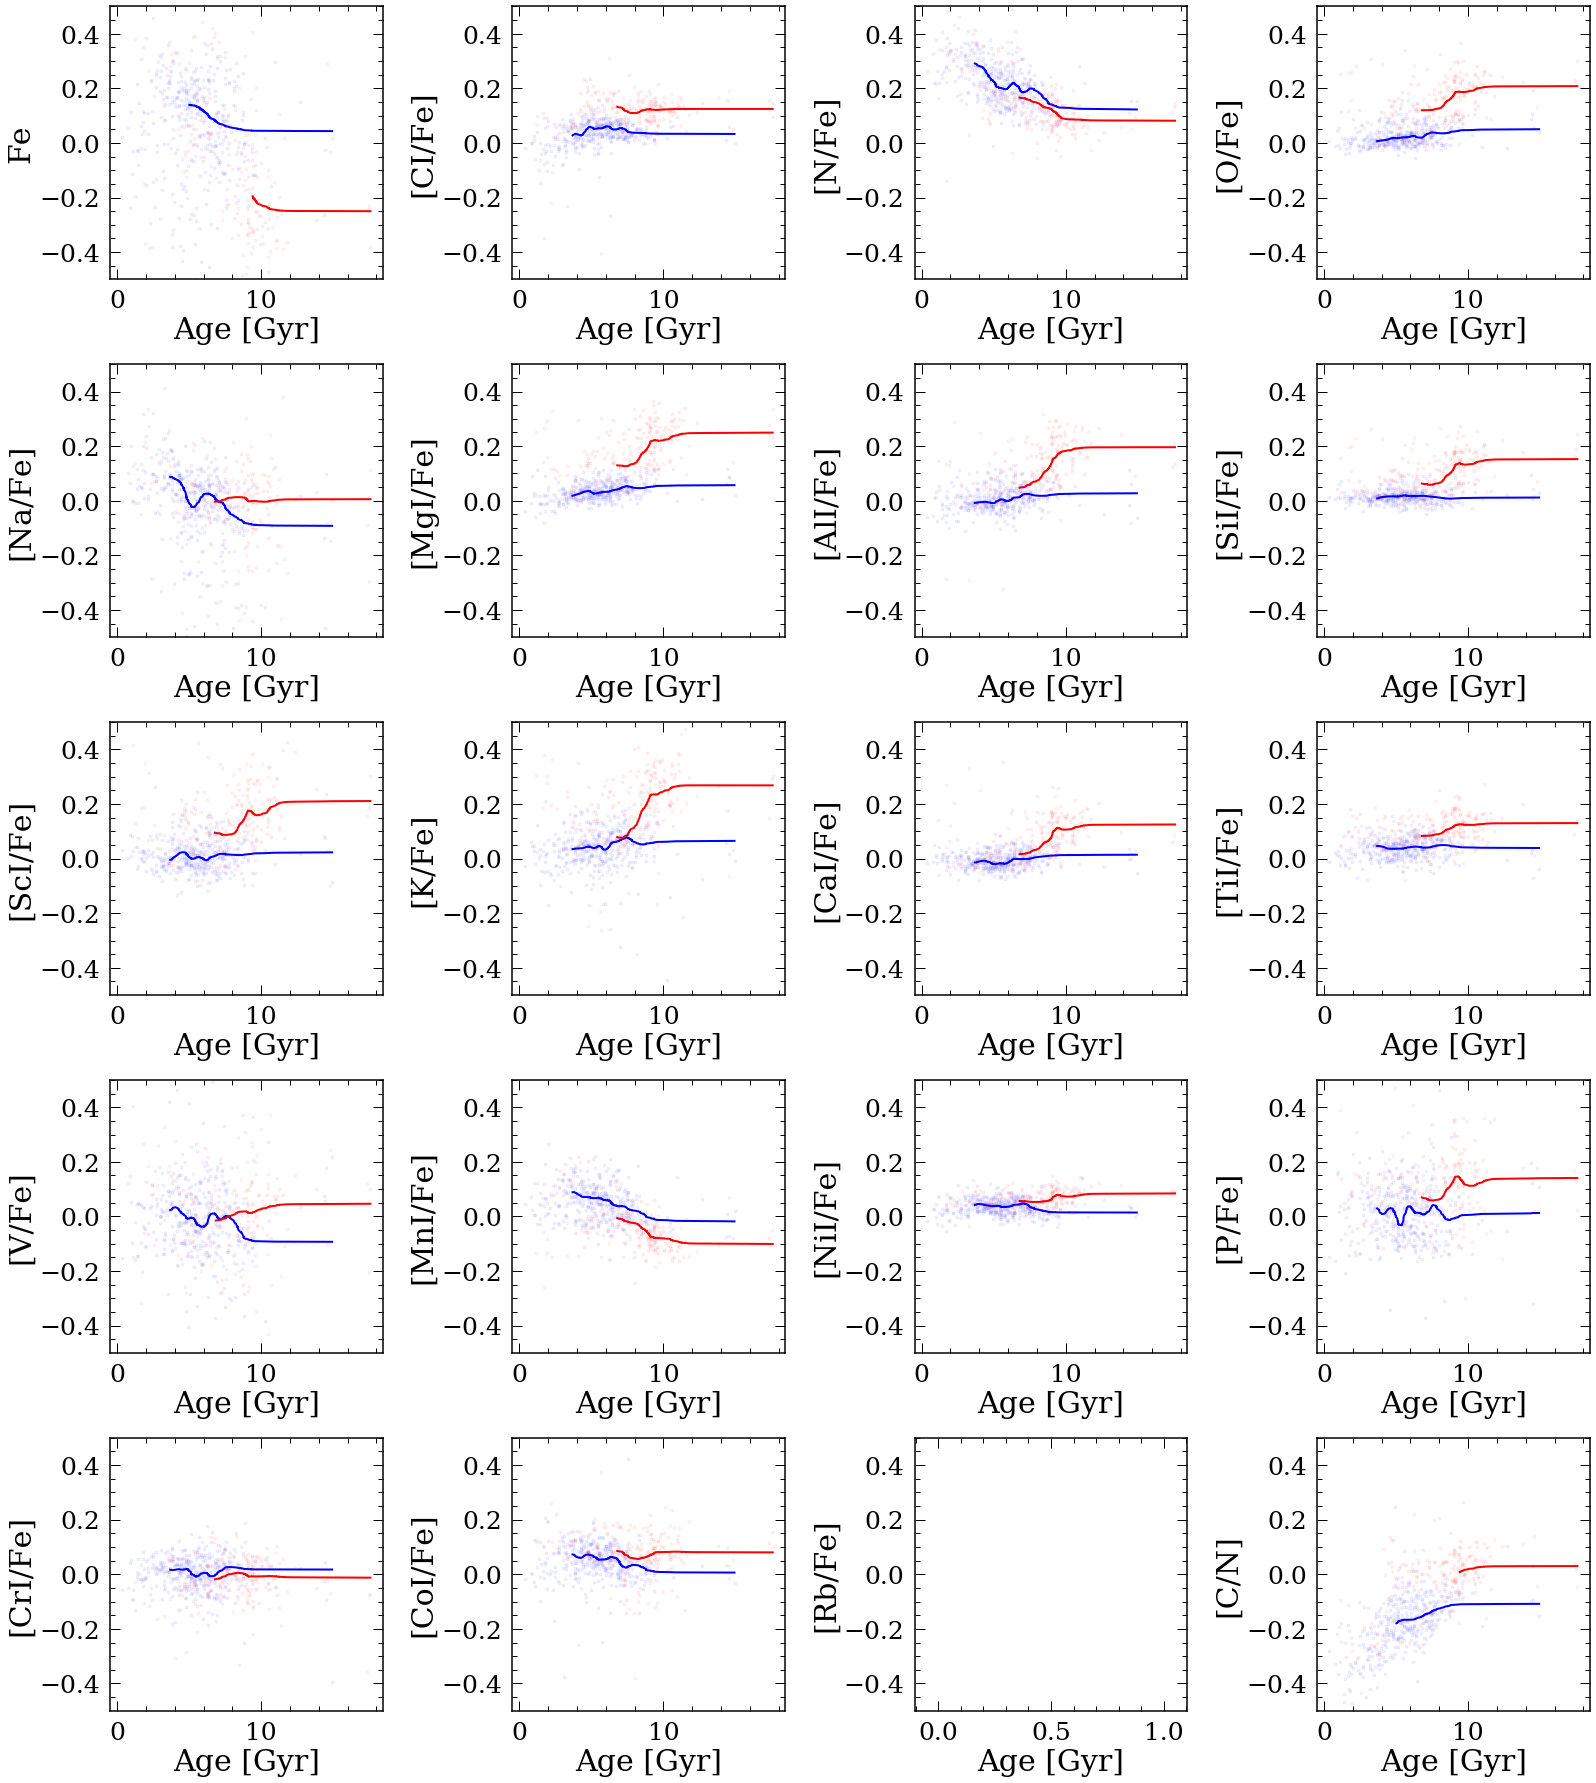

In [86]:
## running median
rn=30
lim=[-0.5,0.5]
from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    larm=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=10)
    harm=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=10)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.05,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:    
        laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
        haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
        
        plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
    plt.ylim(lim)
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
larm=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.05,label='high-$\\alpha$')

laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
larm=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()

plt.tight_layout()

plt.savefig('abund.png')

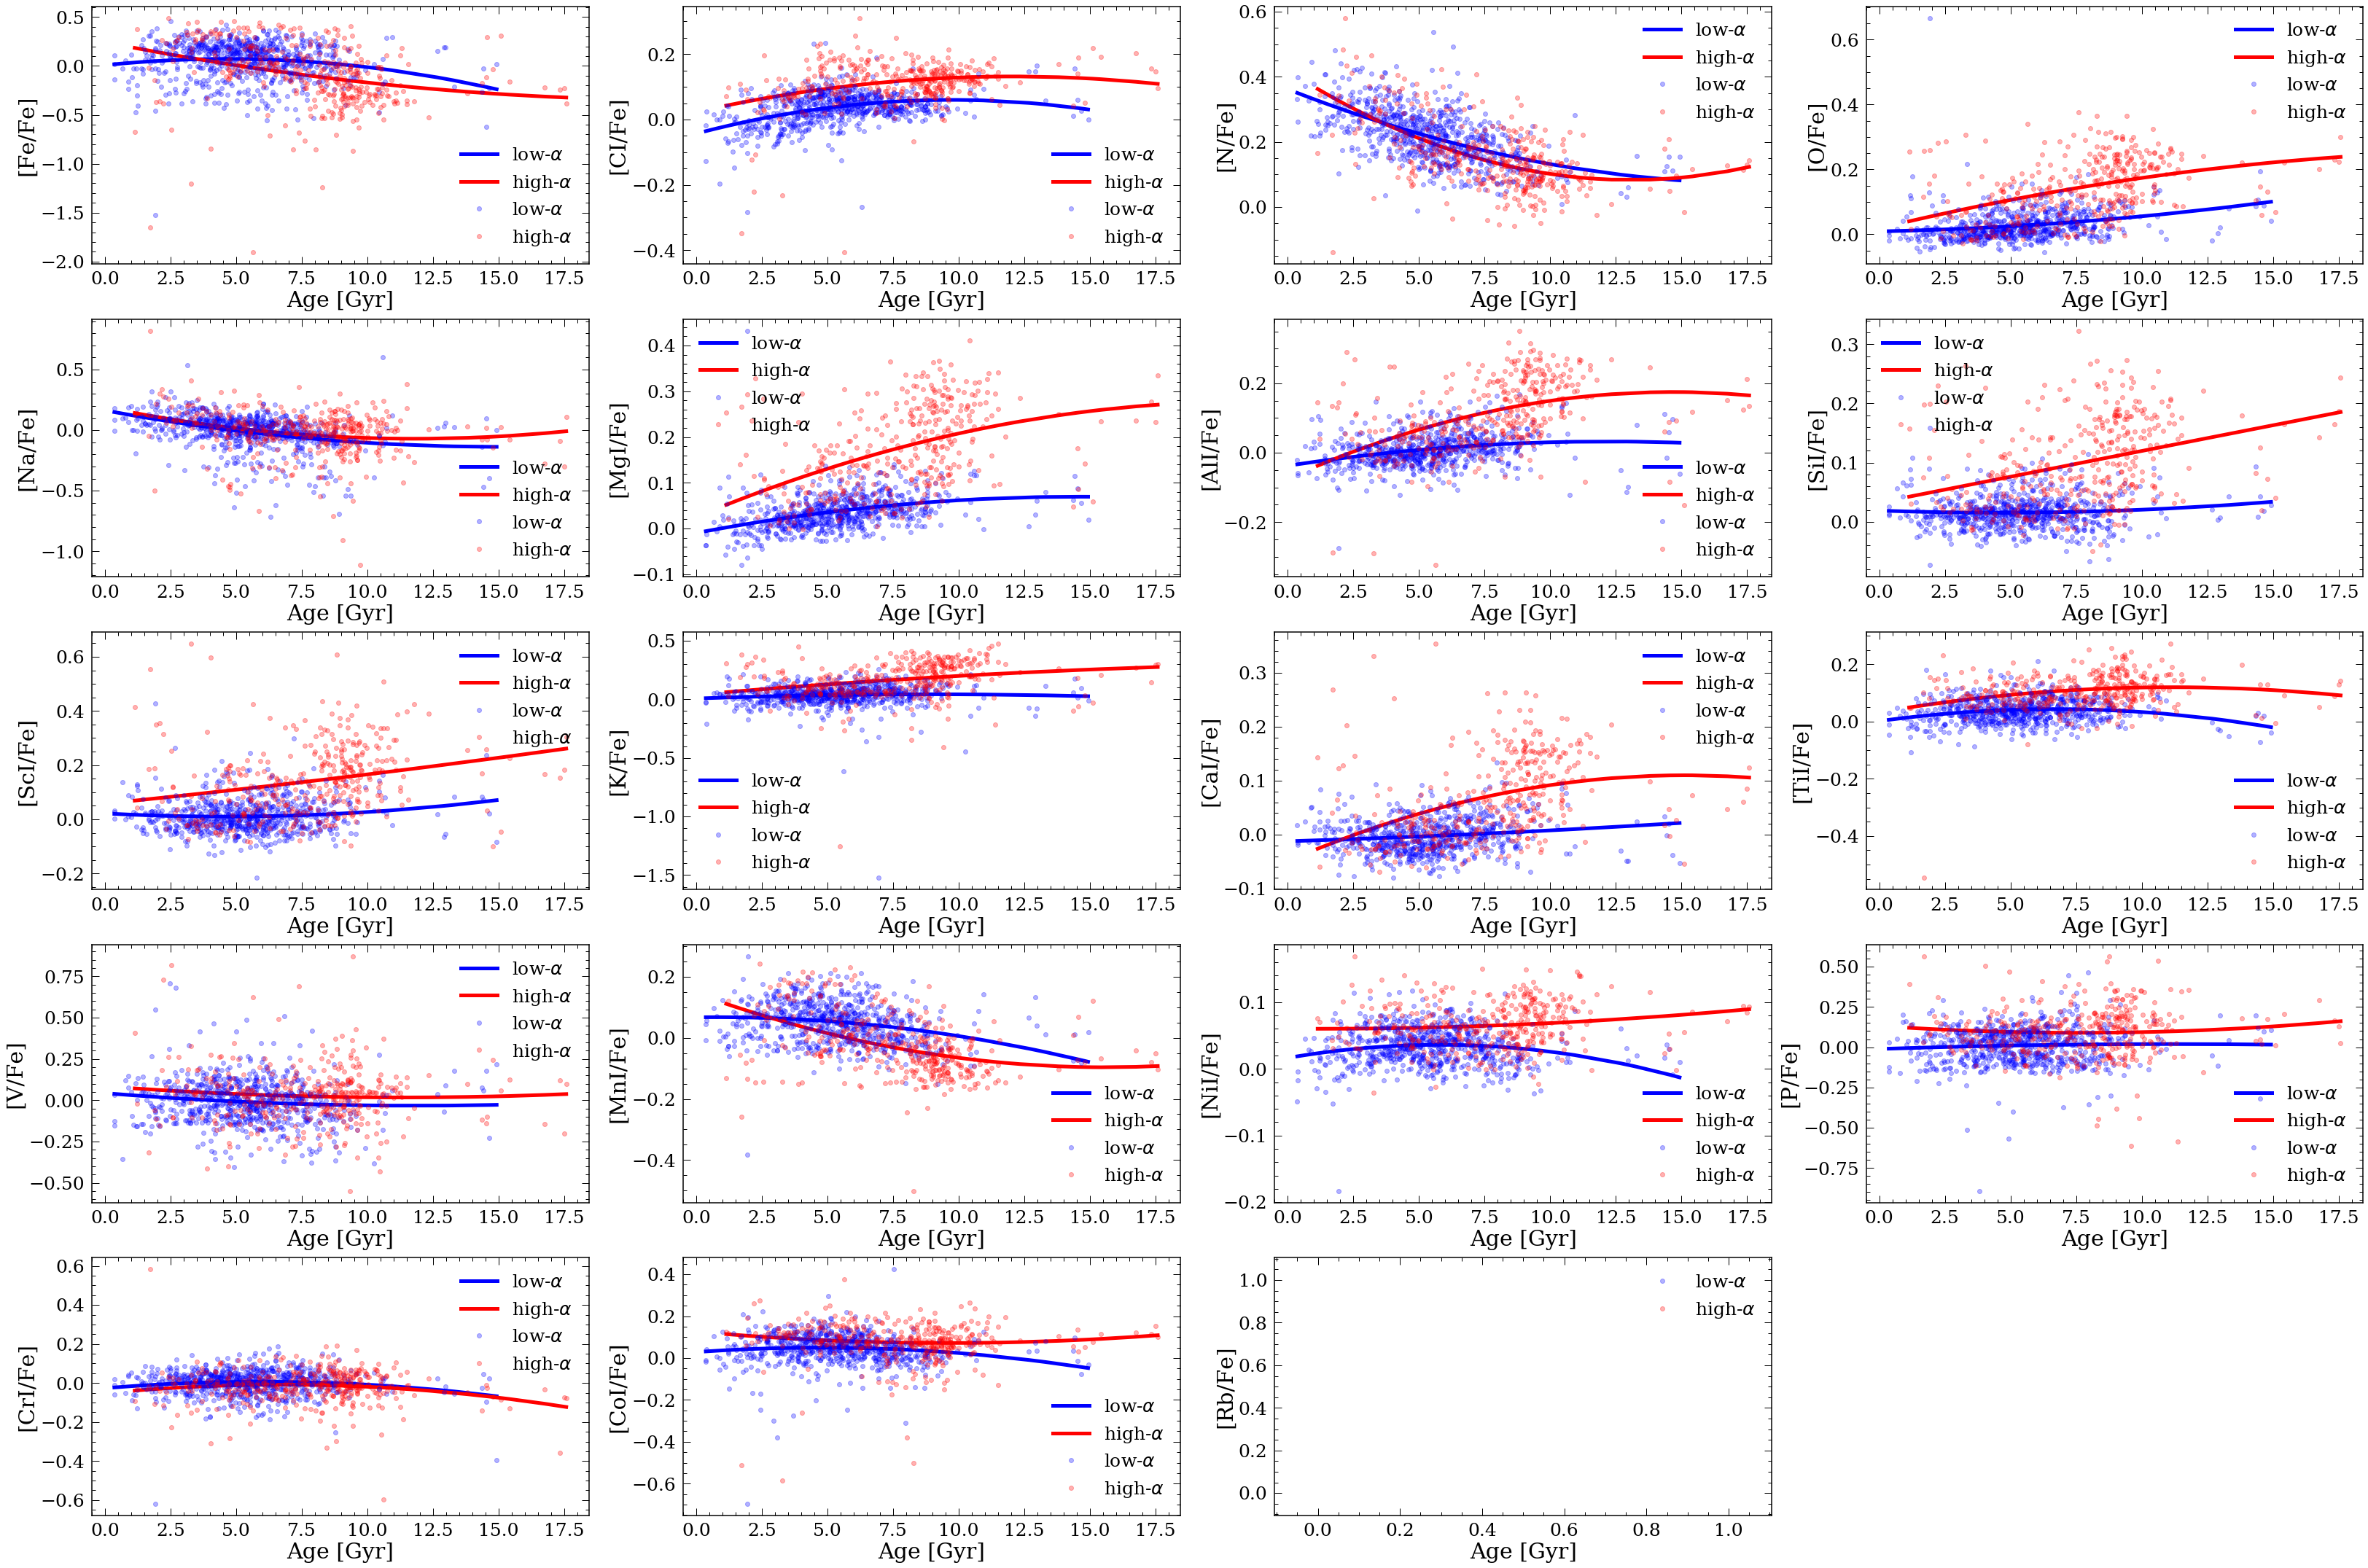

In [73]:
# poly fit

plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    if len(df_plot_la['Age'])!=0:
        zl = np.polyfit(df_plot_la['Age'],df_plot_la[abun_apog[i]],2)
        pl = np.poly1d(zl)
    
        zh = np.polyfit(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],2)
        ph = np.poly1d(zh)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='bo',alpha=0.3,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='ro',alpha=0.3,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:
        plt.plot(df_plot_la['Age'],pl(df_plot_la['Age']),'b-',alpha=1,linewidth=5,label='low-$\\alpha$')
        plt.plot(df_plot_ha['Age'],ph(df_plot_ha['Age']),'r-',alpha=1,linewidth=5,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()

In [21]:
zl

array([-0.00108   ,  0.01364179,  0.00153694])

### Try clustering

In [25]:
dfall=pd.concat([df_plot_la,df_plot_ha]).reset_index(drop=True)


In [ ]:
import time
import warnings

import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 2,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}



plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    
    X = StandardScaler().fit_transform(dfall[['Age',abun_apog[i]]])
    params = default_base.copy()
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])


    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")

    spectral.fit(X)
    
    plt.subplot(3,4,i+1)
    y_pred = spectral.labels_.astype(np.int)

    colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))


    plt.scatter(X[:,0], X[:,1], s=50, color=colors[y_pred])
    plt.ylabel(abund[abun_apog[i]]+'Fe]',fontsize=25)
    plt.xlabel('Age [Gyr]')
plt.tight_layout()



plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    
    X = StandardScaler().fit_transform(dfall[['Age',abun_apog[i]]])
    params = default_base.copy()
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])


    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")

    spectral.fit(X)
    
    plt.subplot(3,4,i+1)
    y_pred = spectral.labels_.astype(np.int)

    colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))


    plt.scatter(dfall['FeH'], dfall['AFe'], s=50, color=colors[y_pred])
    plt.title(abund[abun_apog[i]]+'Fe]',fontsize=25)
    plt.xlabel('[Fe/H]')
    plt.ylabel('[$\\alpha$/Fe]')
    plt.xlim([-0.8,0.7])
    plt.ylim([-0.1,0.4])
plt.tight_layout()



# Calculate dispersion around the running mean

In [52]:
from tqdm import trange
import math
"""
def calcmidval(x_med,y_med,x_val):
    sort_x_med,sort_y_med=zip(*sorted(zip(x_med,y_med)))
    sort_x_med=np.asarray(sort_x_med)
    sort_y_med=np.asarray(sort_y_med)
    if x_val in sort_x_med:
        m=(sort_x_med==x_val)
        #print(sort_y_med[m])
        return sort_y_med[m][0]
    else:
        for i in range(len(sort_x_med)):
            if sort_x_med[i]>x_val:
                if i==0:
                    return sort_y_med[0]
                else:
                    p=fitpoints([sort_x_med[i-1],sort_x_med[i]],[sort_y_med[i-1],sort_y_med[i]])
                    return p(x_val)
            return(sort_y_med[-1])

def calc_tot_disp(df,name):
    x,y,x_med,y_med=df['Age'].values,df[name].values,df['Age'].values,df['med'].values
    m1=x>min(x_med)
    m2=x<max(x_med)
    
    m=m1&m2
    x=x[m]
    y=y[m]
    
    disp=0
    count=0
    #y_calc=[]
    newys=[]
    orys=[]
    for i in range(len(x)):
        y_medin=calcmidval(x_med,y_med,x[i])
        if math.isnan(float(y_medin)):
            continue
        else:
            #disp=disp+(y_medin-y[i])**2.
            newys.append(y_medin)
            orys.append(y[i])
            
            count=count+1
        
        
    #meandisp=np.sqrt(disp/count)
    #return meandisp
    return np.std(np.array(orys)-np.array(newys))

def calc_measure_disp(df,name):
    trytime=100
    agedisp=[]
    
    x,xerr=df['Age'].values,df['Age_err'].values
    y,yerr=df[name].values,df[name+'_ERR'].values
    
    for i in trange(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        
        df['newmed']=gaussian_filter(df['newabun'].rolling(30).median(), sigma=10)

        newdf=df.dropna().reset_index(drop=True)
        
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
    return np.std(np.array(agedisp))
"""
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['Age',name,'med'])
    # calcualte total dispersion
    totdisp=np.mean((df_dropna[name]-df_dropna['med'])**2.)

    # calculate measurement dispersion
    meadisp=np.mean((df[name+'_ERR']**2+df['Age_err']**2))
    
    # calculate int dispersion
    intdisp=np.sqrt(totdisp-meadisp)
    #print('total',totdisp,'measured',meadisp,'intr',intdisp)
    return np.sqrt(totdisp),intdisp

C_FE
N_FE
O_FE
NA_FE
MG_FE
AL_FE
SI_FE
S_FE
K_FE
CA_FE
TI_FE
V_FE
MN_FE
NI_FE
P_FE
CR_FE
CO_FE


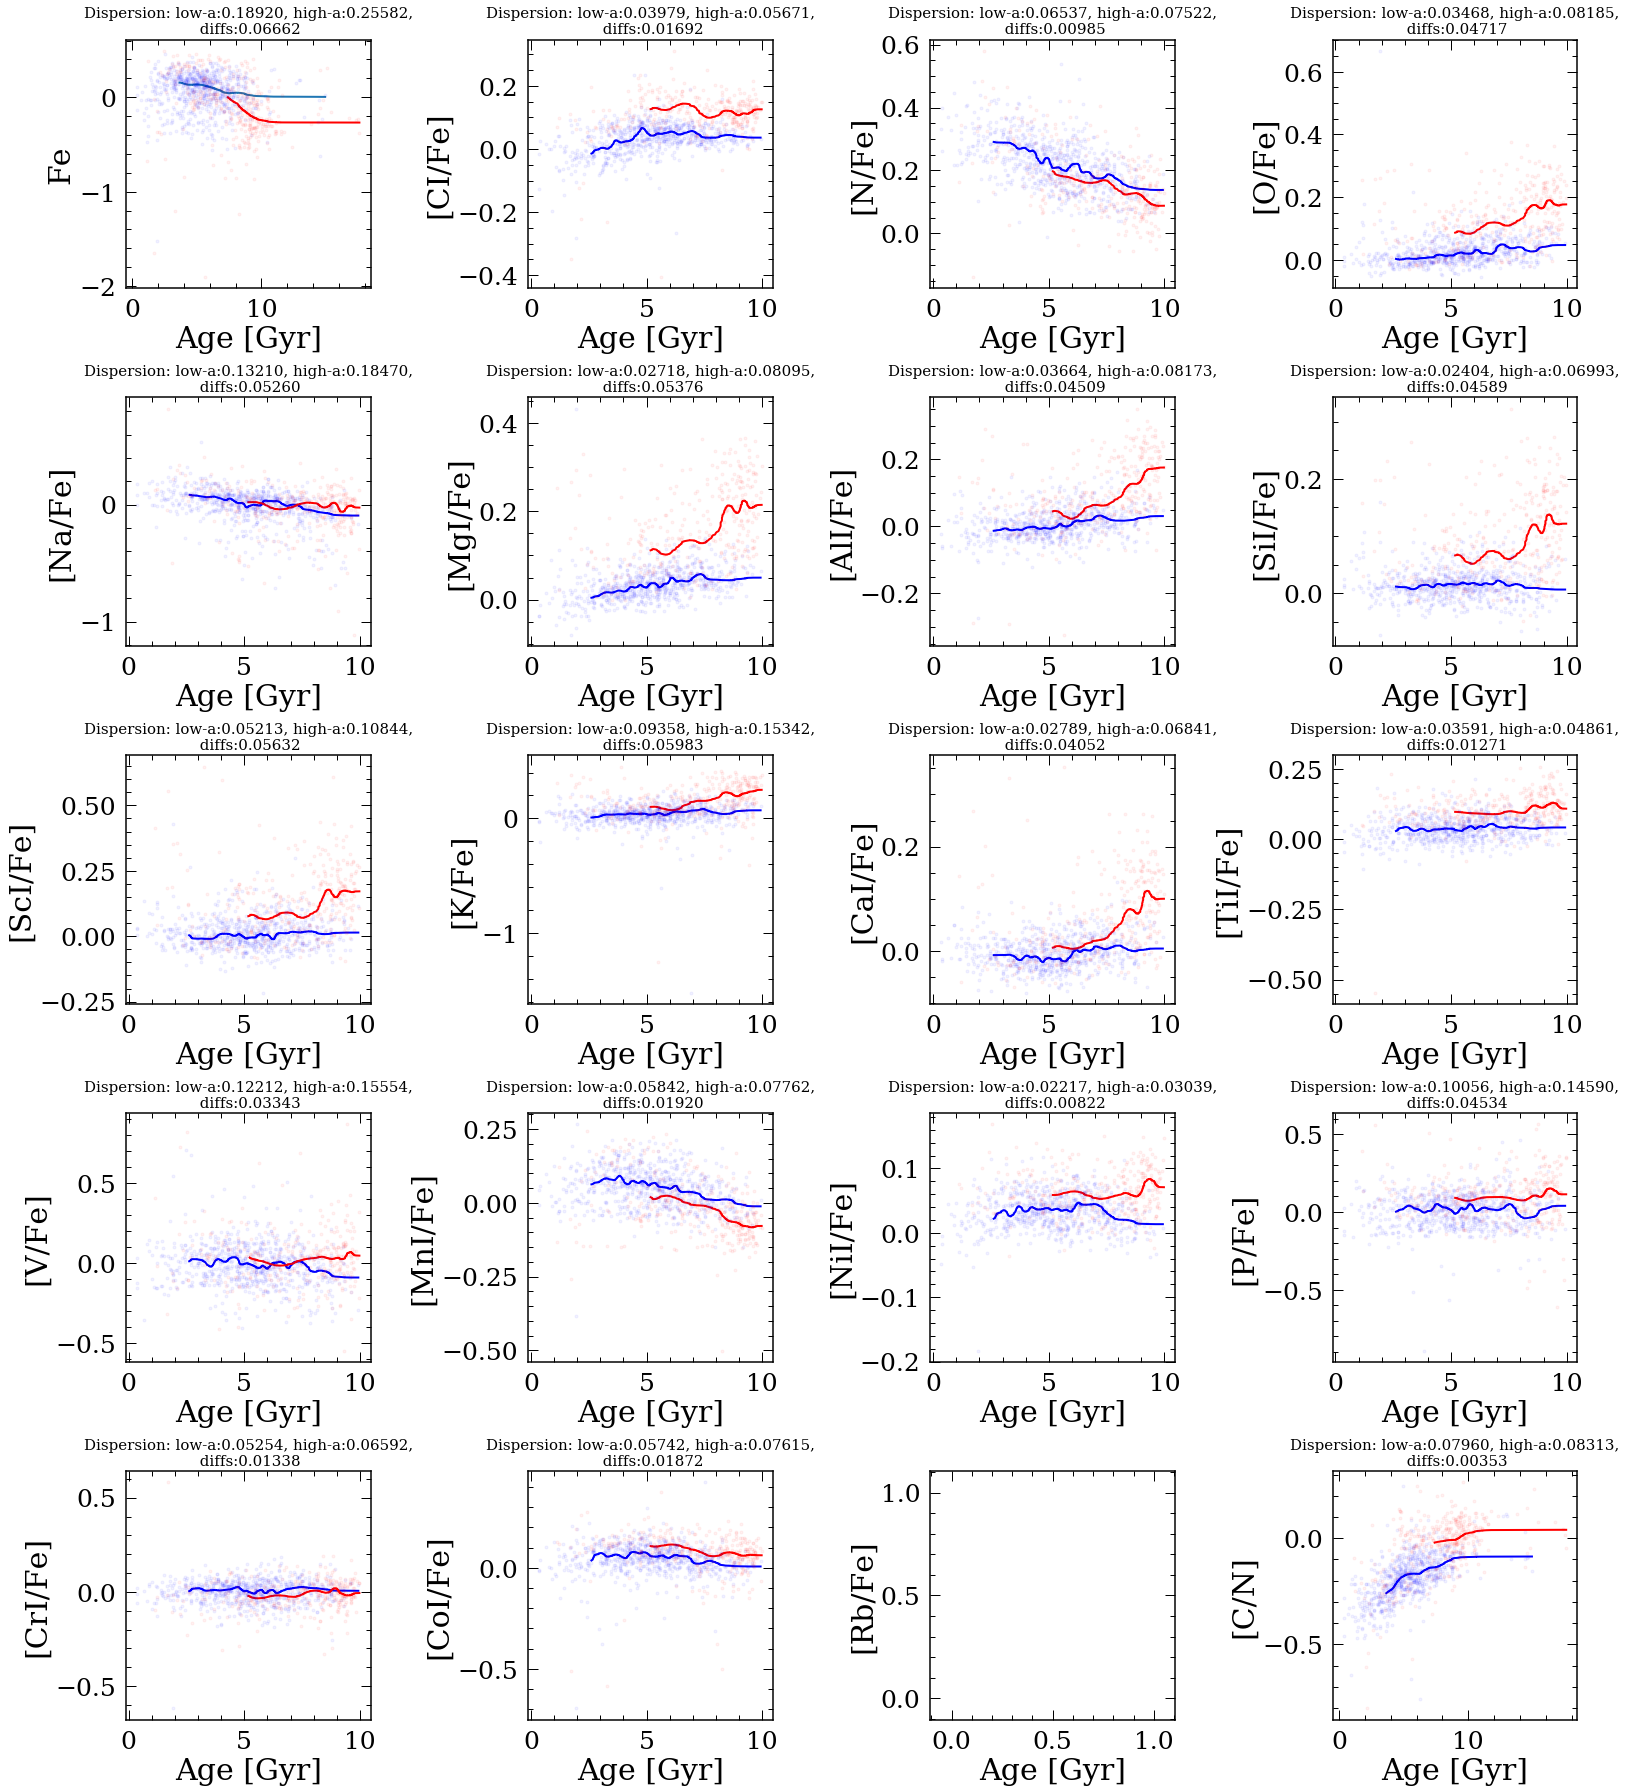

In [53]:
## running median
rn=30

Abunname=[]
hi_dis=[]
lo_dis=[]

tot_hi_dis=[]
tot_lo_dis=[]

from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.loc[df_plot_ha['Age']<10]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.loc[df_plot_la['Age']<10]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    df_plot_la['med']=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=10)
    df_plot_ha['med']=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=10)
    
    df_plot_la_new=df_plot_la.dropna(subset=['Age','med']).reset_index(drop=True)
    df_plot_ha_new=df_plot_ha.dropna(subset=['Age','med']).reset_index(drop=True)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.05,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:   
        print(abun_apog[i])
        
        plt.plot(df_plot_la['Age'],df_plot_la['med'],'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
        
        
        tot_la,disp_la=calc_disp(df_plot_la,abun_apog[i])
        
        tot_ha,disp_ha=calc_disp(df_plot_ha,abun_apog[i])
        #print(abun_apog[i])
        plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)
    
    
        Abunname.append(abund[abun_apog[i]]+'Fe]')
        hi_dis.append(disp_ha)
        lo_dis.append(disp_la)
        tot_hi_dis.append(tot_ha)
        tot_lo_dis.append(tot_la)
        
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    
    
    
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
df_plot_la['med']=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=30)
df_plot_ha['med']=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
plt.plot(df_plot_la['Age'],df_plot_la['med'],alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')

tot_la,disp_la=calc_disp(df_plot_la,'M_H')
tot_ha,disp_ha=calc_disp(df_plot_ha,'M_H')
plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)

Abunname.append('Fe')
hi_dis.append(disp_ha)
lo_dis.append(disp_la)
tot_hi_dis.append(tot_ha)
tot_lo_dis.append(tot_la)

plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha['C_N_ERR']=np.sqrt(df_plot_ha['C_FE_ERR']**2.+df_plot_ha['N_FE_ERR']**2.)
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la['C_N_ERR']=np.sqrt(df_plot_la['C_FE_ERR']**2.+df_plot_la['N_FE_ERR']**2.)
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
df_plot_la['med']=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=30)
df_plot_ha['med']=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
plt.plot(df_plot_la['Age'],df_plot_la['med'],'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')

tot_la,disp_la=calc_disp(df_plot_la,'C_N')
tot_ha,disp_ha=calc_disp(df_plot_ha,'C_N')
  
Abunname.append('[C/N]')
hi_dis.append(disp_ha)
lo_dis.append(disp_la)
tot_hi_dis.append(tot_ha)
tot_lo_dis.append(tot_la)

plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)

plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
#plt.legend()

plt.tight_layout()

In [54]:
Abunname=[i.split('/')[0].split('[')[-1] for i in Abunname]
lo_dis,Abunname,hi_dis,tot_lo_dis,tot_hi_dis=zip(*sorted(zip(lo_dis,Abunname,hi_dis,tot_lo_dis,tot_hi_dis)))

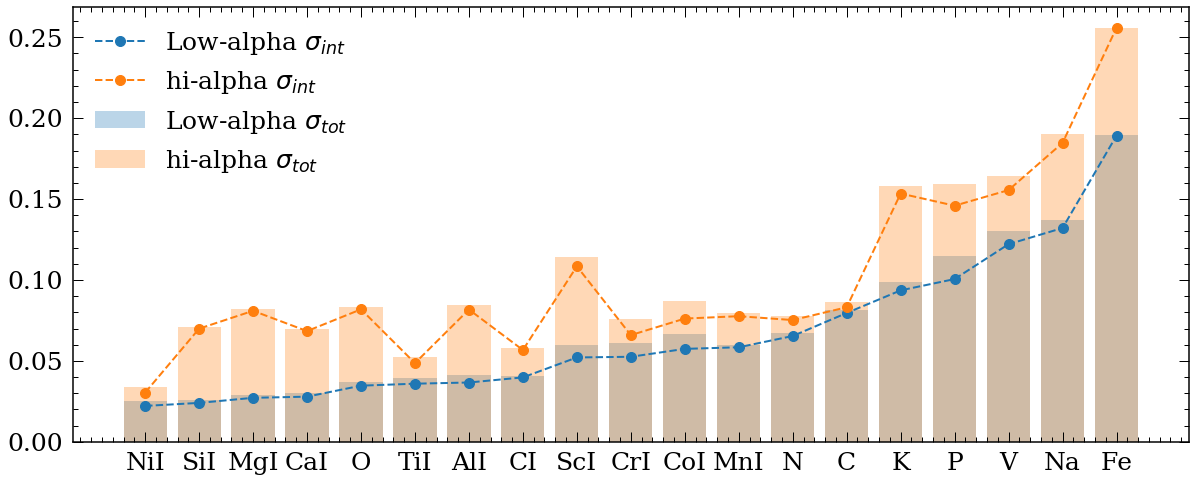

In [55]:
plt.figure(figsize=(20,8))
plt.plot(Abunname,lo_dis,'--o',label='Low-alpha $\sigma_{int}$',markersize=10)
plt.plot(Abunname,hi_dis,'--o',label='hi-alpha $\sigma_{int}$',markersize=10)
plt.bar(Abunname,tot_lo_dis,label='Low-alpha $\sigma_{tot}$',alpha=0.3)
plt.bar(Abunname,tot_hi_dis,label='hi-alpha $\sigma_{tot}$',alpha=0.3)
plt.legend()